# Problem 4

Initial path length: 61429.00146461518


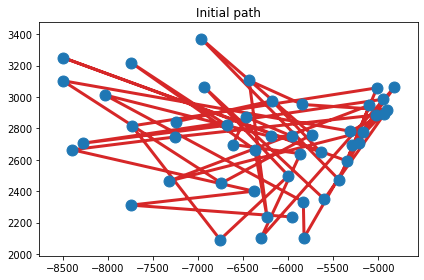

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: overflow encountered in power


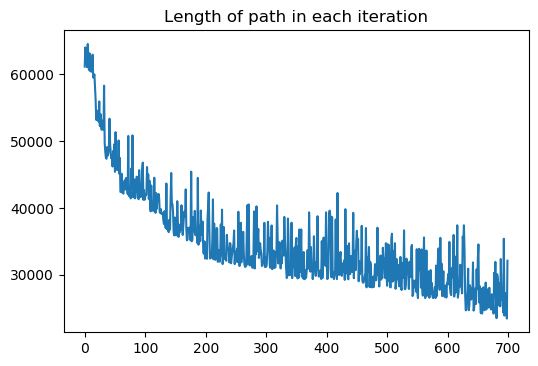

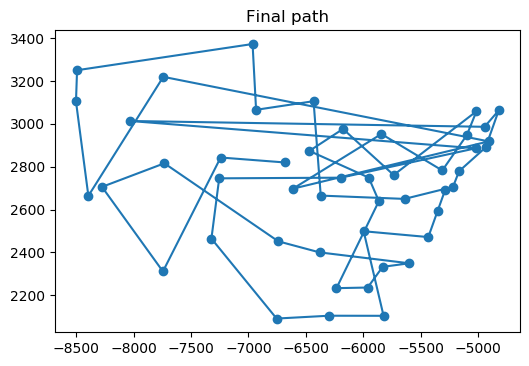

In [24]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.utils.random import sample_without_replacement
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

N_cities = 48
cities_coord = []
f = open("uscap_xy.txt")
line = f.readline()
while line:
    l = line.split()
    l = list(map(float, l))
    cities_coord.append(l)
    line = f.readline()
f.close()

cities_coord = cities_coord[:1] + cities_coord[2:10] + cities_coord[11:]
cities_coord = np.array(cities_coord)

N_dims = 10

# distance matrix: euclidean dist between every point
dist_mat = pairwise_distances(cities_coord, cities_coord, metric='euclidean')

# Parameters
num_iter = 700  # number of iterations
c = 1
# a = 0.5
p = np.arange(0, N_cities)  # Initial path p

# find path length for path p
p_len = 0;  # initial length of path
for a1 in range(0, N_cities - 1):
    p_len = p_len + distance.euclidean(cities_coord[a1], cities_coord[a1 + 1])
print('Initial path length:', str(p_len))

# Save the paths and lengths
pathHistory = np.zeros((num_iter, N_cities))
lenHistory = []
thresh_ar = []

# plot cities and initial path
plt.figure()
x_coord = cities_coord[:, 0]
y_coord = cities_coord[:, 1]
plt.plot(x_coord, y_coord, 'C3', zorder=1, lw=3)
plt.scatter(x_coord, y_coord, s=120, zorder=2)
plt.title('Initial path')
plt.tight_layout()
plt.show()

iter_count = 0;
p2 = []
while iter_count < num_iter:
    iter_count = iter_count + 1;
    # Create path p2 by randomly swap two cities
    # index of two cities for the new path
    swap_i, swap_j = np.random.choice(N_cities, 2)
    p2 = np.copy(p)
    # swap the two cities of the path
    p2[swap_i], p2[swap_j] = p2[swap_j], p2[swap_i]

    # new path length
    p_len2 = 0

    for a1 in range(0, N_cities - 1):
        p_len2 = p_len2 + distance.euclidean(cities_coord[p2[a1]], cities_coord[p2[a1 + 1]])

    thresh = np.power((1 + iter_count), ((p_len - p_len2) / c))

    # change paths if new path is shorter than previous
    if p_len2 - p_len <= 0:
        #         p[:] = p2[:]
        p = np.copy(p2)
        p_len = np.copy(p_len2)

    #  or change paths with probability thres
    else:
        if np.random.rand() <= thresh:
            p = np.copy(p2)
            p_len = np.copy(p_len2)

    # bookeeping
    pathHistory[iter_count - 1][0:len(p2)] = p2
    lenHistory.append(p_len2)
    thresh_ar.append(thresh)

plt.figure(num=None, dpi=100)
plt.plot(lenHistory)
plt.title('Length of path in each iteration')
plt.show()

ind_f = pathHistory[-1, :].astype(int)
x_coord_f = cities_coord[ind_f, 0]
y_coord_f = cities_coord[ind_f, 1]
plt.figure(num=None, dpi=100)
plt.title('Final path')
plt.plot(x_coord_f, y_coord_f, '-o')
plt.show()